In [1]:
import math
import matplotlib.pyplot as plt
import tensorflow
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
dataset=input()
df=pd.read_csv(dataset)

HP_combined.csv


In [4]:
listofcolumnnumber=[4]
for i in range(6,np.shape(df)[1]):
    listofcolumnnumber.append(i)
df.fillna(0, inplace=True)
training_set = df.iloc[:, 4:5].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
lag=60
for i in range(4000,4500):
    X_train.append(training_set_scaled[i-lag:i,:])
    y_train.append(training_set_scaled[i+1, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
np.shape(X_train)

(500, 60, 1)

In [7]:
model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 100))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_1=model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose=1, shuffle=False)


Epoch 1/50
16/16 [==============================] - 1s 81ms/step - loss: 0.0591
Epoch 2/50
16/16 [==============================] - 1s 80ms/step - loss: 0.0106: 0s - loss: 
Epoch 3/50
16/16 [==============================] - 1s 78ms/step - loss: 0.0159
Epoch 4/50
16/16 [==============================] - 1s 88ms/step - loss: 0.0150
Epoch 5/50
16/16 [==============================] - 1s 81ms/step - loss: 0.0113
Epoch 6/50
16/16 [==============================] - 1s 79ms/step - loss: 0.0092
Epoch 7/50
16/16 [==============================] - 1s 77ms/step - loss: 0.0082
Epoch 8/50
16/16 [==============================] - 1s 79ms/step - loss: 0.0088
Epoch 9/50
16/16 [==============================] - 1s 82ms/step - loss: 0.0090
Epoch 10/50
16/16 [==============================] - 1s 77ms/step - loss: 0.0087
Epoch 11/50
16/16 [==============================] - 1s 77ms/step - loss: 0.0084
Epoch 12/50
16/16 [==============================] - 1s 81ms/step - loss: 0.0076
Epoch 13/50
16/16 [=====

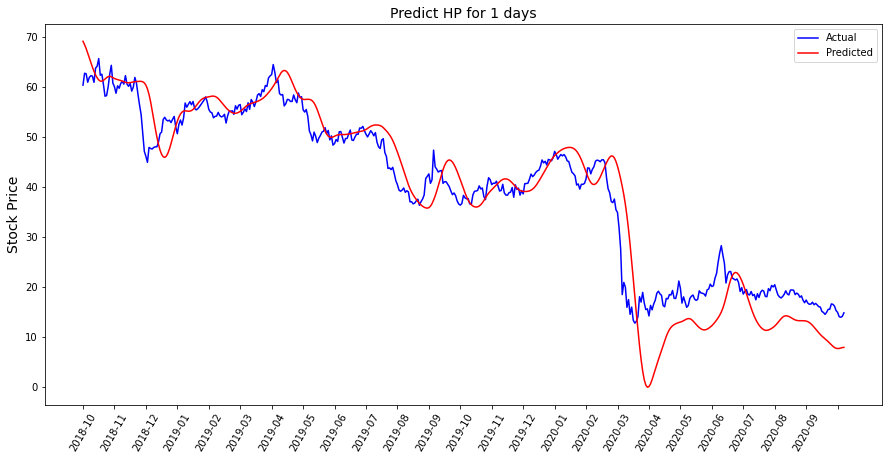

In [8]:
X_test=[]
for i in range(4500,np.shape(training_set_scaled)[0]-1):
    X_test.append(training_set_scaled[i-lag:i,:])
l = []
for i in df[4500:]["Date"].values:
    l.append(i[:-3])
ticks = sorted(list(set(l)))
X_test = np.array(X_test)
predicted_stock_price = model.predict(X_test)
trainPredict_dataset_like = np.zeros(shape=(np.shape(predicted_stock_price)[0],np.shape(X_test)[2]) )
trainPredict_dataset_like[:,0]=predicted_stock_price[:,0]
predicted_stock_price = sc.inverse_transform(trainPredict_dataset_like)[:,0]
plt.figure(figsize=(15, 7))
plt.plot(df.iloc[4500+1:np.shape(training_set_scaled)[0], 4:5].values, color = 'blue', label = 'Actual')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted')
plt.ylabel('Stock Price',fontsize=14)
plt.title("Predict HP for 1 days",fontsize=14)
plt.xticks(np.arange(0,len(l)+1,20), sorted(list(set(l))), rotation=60)
plt.legend()
plt.show()

In [9]:
y_true=df.iloc[4500+1:, 4:5].values

In [10]:
y_true,y_pred=np.ravel(np.array(y_true)),np.array(predicted_stock_price)

In [11]:
MSE_loss = np.mean(np.square(y_true - y_pred), axis=-1)

In [12]:
MSE_loss

29.577336483303174

In [14]:
RMSE=np.sqrt(MSE_loss)

In [15]:
RMSE

5.438504986051146